In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Trabalho Pratico 2
#### Analise consumo e produção de matrizes energéticas brasileiras comparadas com o mundo.
*Vitor Hugo - 3049*  
*Jose Gregorio - 3046*

## Introdução
##### O dado Trabalho foi realizado com o intuito de aplicar os conhecimentos vistos nas aulas e encontros remotos da materia de ciencia de dados.
##### O trabalho foi divido em 4 parte escolha dos dados, preparação dos dados, análise exploratória e análise preditiva estás estarão explícitas no documento para melhor entendimento do fluxo de desenvolvimento do trabalho.

## Escolha e motivação

##### A motivação encontrada para realização do trabalho além de aplicarmos de forma realística os conhecimentos visto em aula queríamos a possibilidade de realizar análise sobre assuntos que tangem a relação do brasil com o meio ambiente, assim escolhemos falar sobre dados energéticos e seus consumos ao longo dos anos, que é um retrato nítido de como vem sendo levado questões ambientais no país.  E além do contexto brasileiro queríamos comparar o brasil com outros países do mundo, para melhor entendimento de como estão as matrizes energéticas ao longo do globo.
##### Para isso os dados escolhidos para análise foram encontrados na IEA(Internetional Energy Agency) no seguinte [link](https://www.iea.org/subscribe-to-data-services/world-energy-balances-and-statistics).Na tabela encontrada no link temos dados das matrizes energeticas de 44 paises diferentes dispostos durante os anos de 1971 a 2018.
##### Dessa forma, essa tabela nos permite um panorama geral dos meios de produção energético de cada país e o fluxo tomado por essa energia produzida. Assim, através desses dados podemos extrair muitos conhecimentos sobre como os países estão lidando com suas matrizes energéticas ao longo dos anos é quais setores mais consomem essa energia.

## Preparação dos dados

##### O primeiro passo da preparação dos dados foi o entendimento mais profundo da tabela e o significado de cada label nela presente. Para isso criamos uma tabela de índices que explica melhor como foi agrupado os dados na tabela e o significado de cada label da tabela usada.
##### Devido a extensão do arquivos criamos este em outro local para ficar mais facil seu entendimento [link](indexes_IEA.md), recomendamos abrir o arquivo em um leitor de markdown.


## Selecionando tabela bruta

In [2]:
xls = pd.ExcelFile('../data/WorldEnergyBalancesHighlights_final.xlsx')

In [3]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019')
df.head(5)

,Source: IEA (2020). All rights reserved. (http://www.iea.org/t&c/termsandconditions/),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Country,Product,Flow,NoCountry,NoProduct,NoFlow,1971,1972,1973,1974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,"Coal, peat and oil shale",Production (ktoe),01. Australia,"01. Coal, peat and oil shale",01. Production (ktoe),32680.1,39371.7,40250.9,39179.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,"Coal, peat and oil shale",Imports (ktoe),01. Australia,"01. Coal, peat and oil shale",02. Imports (ktoe),0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,"Coal, peat and oil shale",Exports (ktoe),01. Australia,"01. Coal, peat and oil shale",03. Exports (ktoe),-12931.7,-14682.3,-17649.3,-17803.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,"Coal, peat and oil shale",Total energy supply (ktoe),01. Australia,"01. Coal, peat and oil shale",04. Total energy supply (ktoe),21121.1,22051.5,22583.9,22172.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpando e tratando dados
- O primeiro problema que encontramos ao analisar a tabela bruta mostrada acima foi a falha ao atribuir o header, de forma que os headers estão sendo reconhecidos como Unnamed. Para resolver esse problema ao iniciar a tabela colocamos como padrão a linha de número 1 como header, assim os headers corretos são reconhecidos.

In [4]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1)
df.head(5)

,Country,Product,Flow,NoCountry,NoProduct,NoFlow,1971,1972,1973,1974,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Australia,"Coal, peat and oil shale",Production (ktoe),01. Australia,"01. Coal, peat and oil shale",01. Production (ktoe),32680.1,39371.7,40250.9,39179.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,"Coal, peat and oil shale",Imports (ktoe),01. Australia,"01. Coal, peat and oil shale",02. Imports (ktoe),0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,"Coal, peat and oil shale",Exports (ktoe),01. Australia,"01. Coal, peat and oil shale",03. Exports (ktoe),-12931.7,-14682.3,-17649.3,-17803.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,"Coal, peat and oil shale",Total energy supply (ktoe),01. Australia,"01. Coal, peat and oil shale",04. Total energy supply (ktoe),21121.1,22051.5,22583.9,22172.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,"Coal, peat and oil shale","Electricity, CHP and heat plants (ktoe)",01. Australia,"01. Coal, peat and oil shale","05. Electricity, CHP and heat plants (ktoe)",-12337.3,-13612.4,-13802.9,-14759.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Outro problema encontrado na tabela foi a criação dos indexes automáticos que não condizem com os indexes que gostariamos Country, Product e Flow. Assim para solucionar esse problema aplicamos as colunas 0,1 e 2 como as colunas indexes.

In [5]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2])
df.head(5)

NoCountry  \
Country   Product                  Flow                                                     
Australia Coal, peat and oil shale Production (ktoe)                        01. Australia   
                                   Imports (ktoe)                           01. Australia   
                                   Exports (ktoe)                           01. Australia   
                                   Total energy supply (ktoe)               01. Australia   
                                   Electricity, CHP and heat plants (ktoe)  01. Australia   

                                                                                               NoProduct  \
Country   Product                  Flow                                                                    
Australia Coal, peat and oil shale Production (ktoe)                        01. Coal, peat and oil shale   
                                   Imports (ktoe)                           01. Coal, peat and oil shale   
                                   Exports (ktoe)                           01. Coal, peat and oil shale   
                                   Total energy supply (ktoe)               01. Coal, peat and oil shale   
                                   Electricity, CHP and heat plants (ktoe)  01. Coal, peat and oil shale   

                                                                                                                 NoFlow  \
Country   Product                  Flow                                                                                   
Australia Coal, peat and oil shale Production (ktoe)                                              01. Production (ktoe)   
                                   Imports (ktoe)                                                    02. Imports (ktoe)   
                                   Exports (ktoe)                                                    03. Exports (ktoe)   
                                   Total energy supply (ktoe)                            04. Total energy supply (ktoe)   
                                   Electricity, CHP and heat plants (ktoe)  05. Electricity, CHP and heat plants (ktoe)   

                                                                               1971  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        32680.1   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -12931.7   
                                   Total energy supply (ktoe)               21121.1   
                                   Electricity, CHP and heat plants (ktoe) -12337.3   

                                                                               1972  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        39371.7   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -14682.3   
                                   Total energy supply (ktoe)               22051.5   
                                   Electricity, CHP and heat plants (ktoe) -13612.4   

                                                                               1973  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        40250.9   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -17649.3   
                                   Total energy supply (ktoe)               22583.9   
                                   Electricity, CHP and heat plants

- Outros 2 problemas encontrados na tabela foi a leitura incorreta de colunas que não haviam dados com as "Unnamed: 55" a "Unnamed: 64", e as colunas com valores de repetidos de outras colunas como é o caso das colunas NoCountry, Product, NoFollow. Para esses problemas como estávamos usando uma tabela do excel a solução foi basicamente selecionar os ranges dos nomes das colunas que queríamos usar, assim descartando as outras com erros.

In [6]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,G:BC")
df.head(5)

1971  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        32680.1   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -12931.7   
                                   Total energy supply (ktoe)               21121.1   
                                   Electricity, CHP and heat plants (ktoe) -12337.3   

                                                                               1972  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        39371.7   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -14682.3   
                                   Total energy supply (ktoe)               22051.5   
                                   Electricity, CHP and heat plants (ktoe) -13612.4   

                                                                               1973  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        40250.9   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -17649.3   
                                   Total energy supply (ktoe)               22583.9   
                                   Electricity, CHP and heat plants (ktoe) -13802.9   

                                                                               1974  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        39179.4   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -17803.2   
                                   Total energy supply (ktoe)               22172.6   
                                   Electricity, CHP and heat plants (ktoe) -14759.4   

                                                                               1975  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        44767.1   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -20294.9   
                                   Total energy supply (ktoe)               23839.8   
                                   Electricity, CHP and heat plants (ktoe) -15869.6   

                                                                               1976  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                          44161   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -18793.5   
                                   Total energy supply (ktoe)               23797.8   
                                   Electricity, CHP and heat plants (ktoe) -16341.7   

                                                                               1977  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                        48910.5   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                      

In [7]:
## Lendo dados do Brasil
br = df.loc[('Brazil')]
br.head(5)

1971 1972  \
Product                  Flow                                                
Coal, peat and oil shale Production (ktoe)                         ..   ..   
                         Imports (ktoe)                            ..   ..   
                         Exports (ktoe)                            ..   ..   
                         Total energy supply (ktoe)                ..   ..   
                         Electricity, CHP and heat plants (ktoe)   ..   ..   

                                                                 1973 1974  \
Product                  Flow                                                
Coal, peat and oil shale Production (ktoe)                         ..   ..   
                         Imports (ktoe)                            ..   ..   
                         Exports (ktoe)                            ..   ..   
                         Total energy supply (ktoe)                ..   ..   
                         Electricity, CHP and heat plants (ktoe)   ..   ..   

                                                                 1975 1976  \
Product                  Flow                                                
Coal, peat and oil shale Production (ktoe)                         ..   ..   
                         Imports (ktoe)                            ..   ..   
                         Exports (ktoe)                            ..   ..   
                         Total energy supply (ktoe)                ..   ..   
                         Electricity, CHP and heat plants (ktoe)   ..   ..   

                                                                 1977 1978  \
Product                  Flow                                                
Coal, peat and oil shale Production (ktoe)                         ..   ..   
                         Imports (ktoe)                            ..   ..   
                         Exports (ktoe)                            ..   ..   
                         Total energy supply (ktoe)                ..   ..   
                         Electricity, CHP and heat plants (ktoe)   ..   ..   

                                                                 1979 1980  \
Product                  Flow                                                
Coal, peat and oil shale Production (ktoe)                         ..   ..   
                         Imports (ktoe)                            ..   ..   
                         Exports (ktoe)                            ..   ..   
                         Total energy supply (ktoe)                ..   ..   
                         Electricity, CHP and heat plants (ktoe)   ..   ..   

                                                                  ...  \
Product                  Flow                                     ...   
Coal, peat and oil shale Production (ktoe)                        ...   
                         Imports (ktoe)                           ...   
                         Exports (ktoe)                           ...   
                         Total energy supply (ktoe)               ...   
                         Electricity, CHP and heat plants (ktoe)  ...   

                                                                     2010  \
Product                  Flow                                               
Coal, peat and oil shale Production (ktoe)                        2104.74   
                         Imports (ktoe)                           12109.9   
                         Exports (ktoe)                                 0   
                         Total energy supply (ktoe)               14468.2   
                         Electricity, CHP and heat plants (ktoe) -3136.74   

                                                                     2011  \
Product                  Flow                                               
Coal, peat and oil shale Production (ktoe)                        2133.85   
                         Imports (ktoe)        

- Ao lermos os dados do Brasil é perceptível que não há dados entre os anos de 1971-1989 e 2019(devido estarem sendo apurado ainda). Assim, foi removido as colunas referente aos anos de 1971-1989, 2019, pois não seria interessante em nossas análises já que o Brasil é o foco principal de análise. Novamente, utilizamos do artifício de podermos selecionar o range dos nomes das colunas que nos mais interessa.

In [8]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB")
df.head(5)

1990  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                         106103   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -67266.6   
                                   Total energy supply (ktoe)               34887.7   
                                   Electricity, CHP and heat plants (ktoe) -28923.5   

                                                                               1991  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                         114763   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -78214.3   
                                   Total energy supply (ktoe)                 36278   
                                   Electricity, CHP and heat plants (ktoe) -29947.3   

                                                                               1992  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                         119139   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -82012.1   
                                   Total energy supply (ktoe)               36831.9   
                                   Electricity, CHP and heat plants (ktoe) -30720.2   

                                                                               1993  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                         119983   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -85625.3   
                                   Total energy supply (ktoe)               37558.8   
                                   Electricity, CHP and heat plants (ktoe) -30918.1   

                                                                               1994  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                         118687   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -85120.1   
                                   Total energy supply (ktoe)               37113.1   
                                   Electricity, CHP and heat plants (ktoe) -31308.9   

                                                                               1995  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                         127823   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                          -88594.5   
                                   Total energy supply (ktoe)               37498.2   
                                   Electricity, CHP and heat plants (ktoe) -32383.4   

                                                                               1996  \
Country   Product                  Flow                                               
Australia Coal, peat and oil shale Production (ktoe)                         129956   
                                   Imports (ktoe)                                 0   
                                   Exports (ktoe)                      

In [9]:
df.dtypes

1990    object
1991    object
1992    object
1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
dtype: object

- Percebemos que os tipos de dados das colunas estevão como objetos apesar de ser esperados serem do tipo float. Assim ao estudarmos a fundo a planilha e abrir está em um leitor de arquivos xlsx, encontramos na pagina definitions a existência de dois tipos de valores os  '..' : Não há dados e o 'c' : confidencial. Assim percebemos que haveria a necessidade de transformar esses valores em valores Nan para que houvesse a possibilidade de tratar as colunas como float.

In [10]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
df.dtypes

1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
dtype: object

## Análise exploratória
##### Na análise exploratória procuramos entender melhor a correlação possíveis entre os dados, além das informações e conhecimentos que poderíamos extrair com bases nas correlações e análises.

### Preparação
##### Nosso primeiro objetivo foi ter uma lista explícita com os países sem a interferencia dos agrupamentos regionais para isso pegamos o index dos países e limpamos manualmente tudo aquilo que era um agrupamento.

In [11]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
indexes:pd.MultiIndex  = df.index
pd.unique(indexes.get_level_values('Country'))

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States',
       'OECD Total', 'Brazil', "People's Republic of China", 'India',
       'Indonesia', 'Morocco', 'Singapore', 'South Africa', 'Thailand',
       'Non-OECD Total', 'Africa', 'Non-OECD Americas',
       'Non-OECD Asia (including China)', 'Non-OECD Europe and Eurasia',
       'Middle East', 'IEA Total',
       'IEA and Accession/Association countries', 'World'], dtype=object)

In [12]:
countries = [
"Australia",
"Austria",
"Belgium",
"Canada",
"Chile",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Japan",
"Korea",
"Latvia",
"Lithuania",
"Luxembourg",
"Mexico",
"Netherlands",
"New Zealand",
"Norway",
"Poland",
"Portugal",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Turkey",
"United Kingdom",
"United States",
"Brazil",
"People's Republic of China",
"India",
"Indonesia",
"Morocco",
"Singapore",
"South Africa",
"Thailand"]

##### Também achamos interessante agrupar esses paises em continentes, uma vez que na etapa de gerar perguntas sobre os dados criamos perguntas relacionadas a comparações entre continentes.

In [13]:
asia = [
"Japan",
"Korea",
"People's Republic of China",
"India",
"Indonesia",
"Singapore",
"Thailand"
]

oceania= [
"Australia",
"New Zealand"]

america= [
"Canada",
"Chile",
"Mexico",
"United States",
"Brazil",
]

europa= [
"Austria",
"Belgium",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Netherlands",
"New Zealand",
"Norway",
"Poland",
"Portugal",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Turkey",
"United Kingdom",]

##### Também foi relevante a criação de uma tabela só com os dados do Brasil que é o nosso foco de análise e do mundo para fácil usabilidade e comparação.Além disso geramos csv's dos mesmo para podermos termos uma melhor dimensão de alguns dados e características de possíveis análises.

In [14]:
br = df.loc[('Brazil')]
world = df.loc[('World')]

world.to_csv('world.csv')
br.to_csv('br.csv')

##### Por fim a última preparação que fizemos nos dados foi criar uma lista com todos os anos para facilitar a criação de tabelas e talvez futuras análises.

In [15]:
years = df.transpose().index.tolist()
def commanPlot(obj,list_year=years):
    obj.plot(figsize=(15,10))
    plt.xticks(list_year)
    plt.xticks(rotation=90)
    plt.show()

### Análise exploratória

#### 1) No grafo a seguir realizamos comparações entre os 4 consumidores finais das matrizes energéticas brasileiras, sendo a linha de azul a soma total destas.

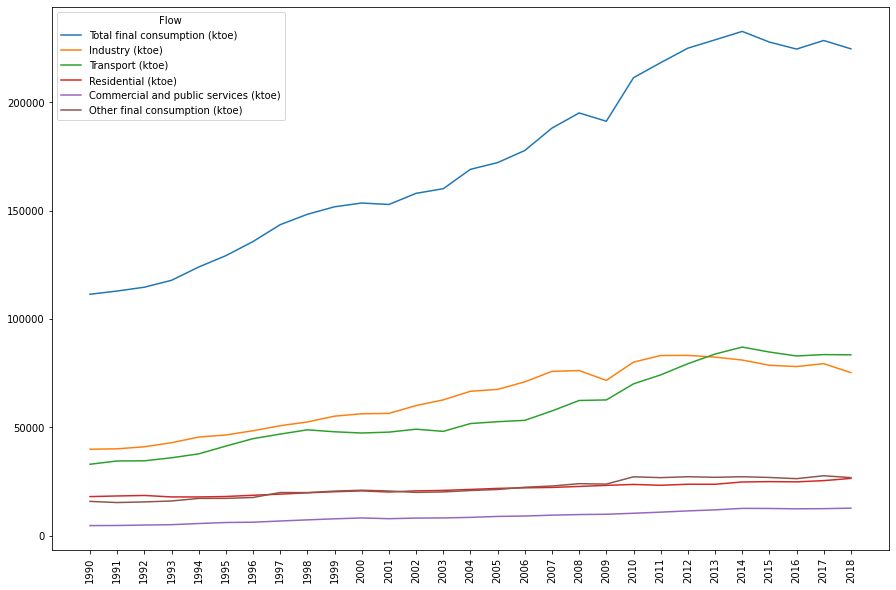

In [16]:
total:pd.DataFrame = br.loc[('Total')].iloc[6:12].transpose()
commanPlot(total)

##### Conclusões: É perceptível que os maiores consumidores no brasil são as áreas de transporte e da indústria, o que já era de se esperar devido suas grandes demandas energéticas, todavia o que nos surpreendeu foi o fato da indústria agrícola inclusa no(Other final consumption) se a que menos gasta energia entre as demais.

#### 2) No gráfico a seguir realizamos comparações entre as 3 formas de produção de energia, sendo a linha vermelha o somatório das demais.

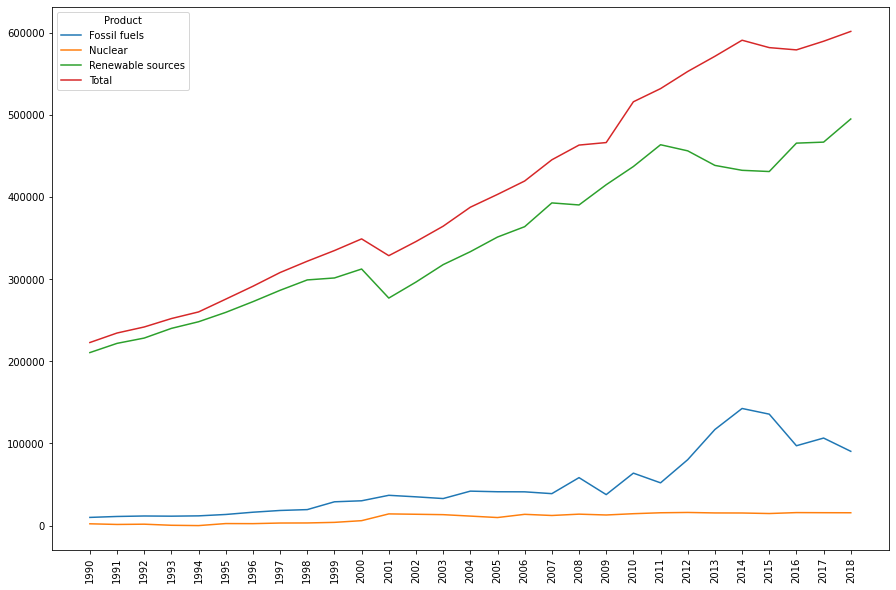

In [17]:
#produção energetica no brasil
eletric = br.xs('Electricity output (GWh)',level='Flow').transpose()
commanPlot(eletric)

##### Conclusões: É nitido a lacuna de mais de 10000 Gwh de diferença entre a produção de energia Fóssil em comparação com a renovavel. Todavia ao realizar esse gráfico e pensar sobre ele nos veio a questão se essa lacuna também se reflete no consumo, se realmente toda essa energia renovável é a mais consumida pelos setores de consumo.

##### Outra questão que nos intrigou foi quanto ao pico de produção de energia fóssil entre os anos de 2011 a 2016, estipulamos que talvez  este fato esteja relacionado com os anos de crise hídrica no Brasil, mas bem provavel que haja outros fatores por trás como o inicio da exportação do petróleo produzido no pré sal.

#### 3) Nos gráficos a seguir vemos as comparações do consumos total de energia ao longo dos anos e mais detalhadamente no ano de 2018 

In [18]:
#consumo de energias renovaveis no brasil
total_br_prod_renew = br.loc[('Renewables and waste')].iloc[6:12].transpose()
total_br_prod_renew['Total Renovavel'] = total_br_prod_renew['Total final consumption (ktoe)']

#consumo de derivados do petroleo
total_br_prod_fossiel = br.loc[('Oil products')].iloc[6:12].transpose()
total_br_prod_fossiel['Total Derivados petroleo'] = total_br_prod_fossiel['Total final consumption (ktoe)']

#consumo de gas natural no brasil
total_br_prod_natural = br.loc[('Natural gas')].iloc[6:12].transpose()
total_br_prod_natural['Total Gás Natural'] = total_br_prod_natural['Total final consumption (ktoe)']

#consumo de energia nuclear
total_br_prod_nuclear = br.loc[('Nuclear')].iloc[6:12].transpose()
total_br_prod_nuclear['Total Nuclear'] = total_br_prod_nuclear['Total final consumption (ktoe)']

#consumo de carvão
total_br_prod_coal = br.loc[('Coal, peat and oil shale')].iloc[6:12].transpose()
total_br_prod_coal['Total Carvão'] = total_br_prod_coal['Total final consumption (ktoe)']

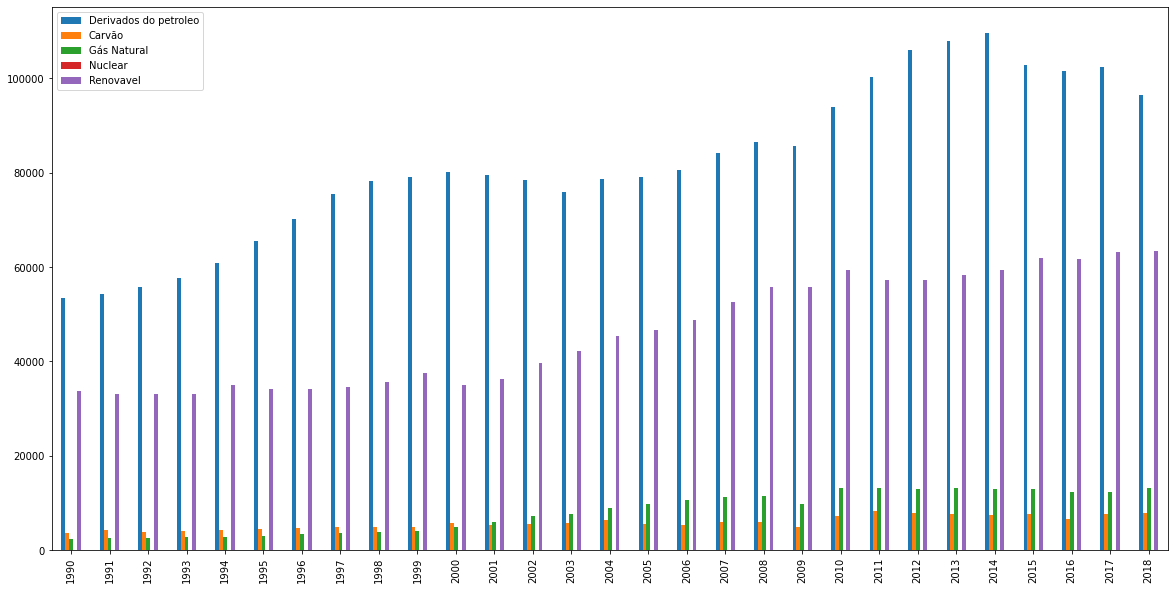

In [19]:
# Comparação do total do consumo ao longo dos anos de cada tipo de fonte energetica
teste = pd.concat([total_br_prod_fossiel['Total Derivados petroleo'],total_br_prod_coal['Total Carvão'],total_br_prod_natural['Total Gás Natural'],total_br_prod_nuclear['Total Nuclear'],total_br_prod_renew['Total Renovavel']],axis=1)
teste.plot(kind='bar',figsize=(20,10))
plt.legend(['Derivados do petroleo','Carvão','Gás Natural','Nuclear','Renovavel'])

<AxesSubplot:>

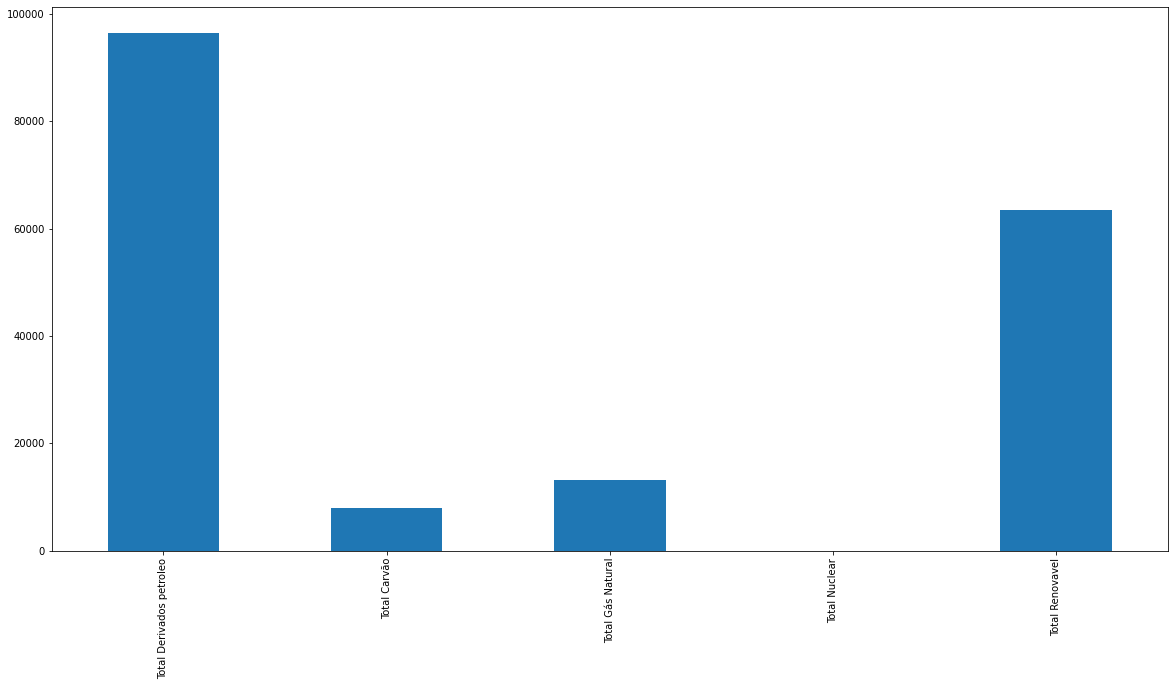

In [20]:
# Comparação do total do consumo no ano de 2018 de cada tipo de fonte energetica
teste.loc[(2018)].plot(kind='bar',figsize=(20,10))

##### Conclusões: Como mostrado pelos gráficos percebemos que os consumos totais são liderados pela energia renovável e principalmente pelos produtos derivados do petróleo o que é estranho, pois apesar da grande produção de energia limpa não a usamos em todo seu potencial. Outra análise pode ser feita quanto aos três menos usados gaś natural, nuclear e carvão, percebemos que o carvão vem perdendo terreno ao longo dos anos e para o consumo de gás natural e já a nuclear é tão pouco seu consumo que nem aparece nos gráficos. 

#### 4) O grafico a seguir compara as diversas fontes de consumos especificamente das energias renováveis

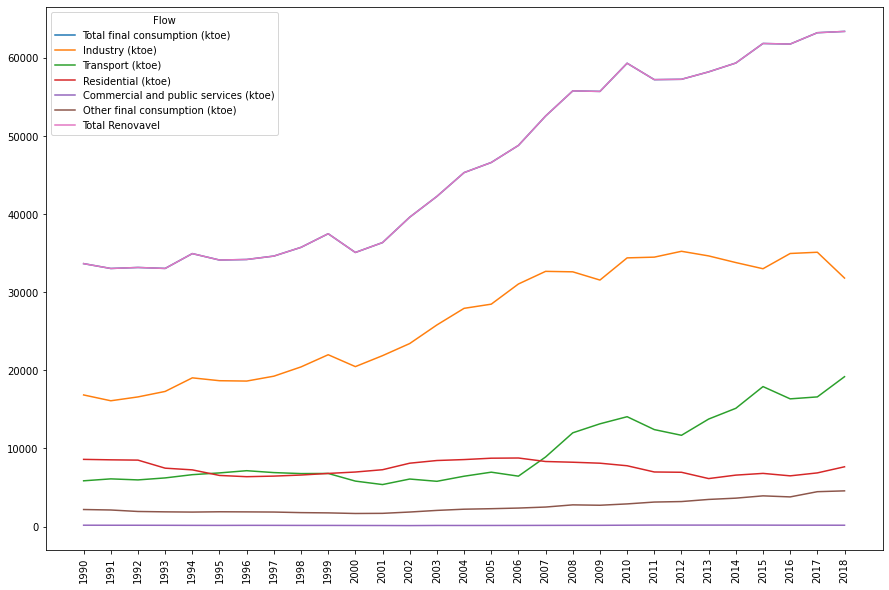

In [21]:
commanPlot(total_br_prod_renew)

##### Conclusões: Uma conclusão interessante retirada e o fato de as indústrias terem um alto consumo de energias renováveis o que mostra que muitas destas devem possuir uma possível baixa emissão de carbono, outro ponto positivo e o aumento do consumos dessas energias por parte da indústria do transporte que ao longo do tempo vem aumentando grandemente seu consumo. Por outro lado algo que nos instigou foi sobre o consumo residencial, esperávamos que este fosse maior devido ao crescimento da população ao longo dos anos e também devido a maior possibilidade de aquisição de produtos eletrônicos por indivíduo. 

#### 5) O grafico a seguir compara as diversas fontes de consumos especificamente dos produtos derivados do petroleo

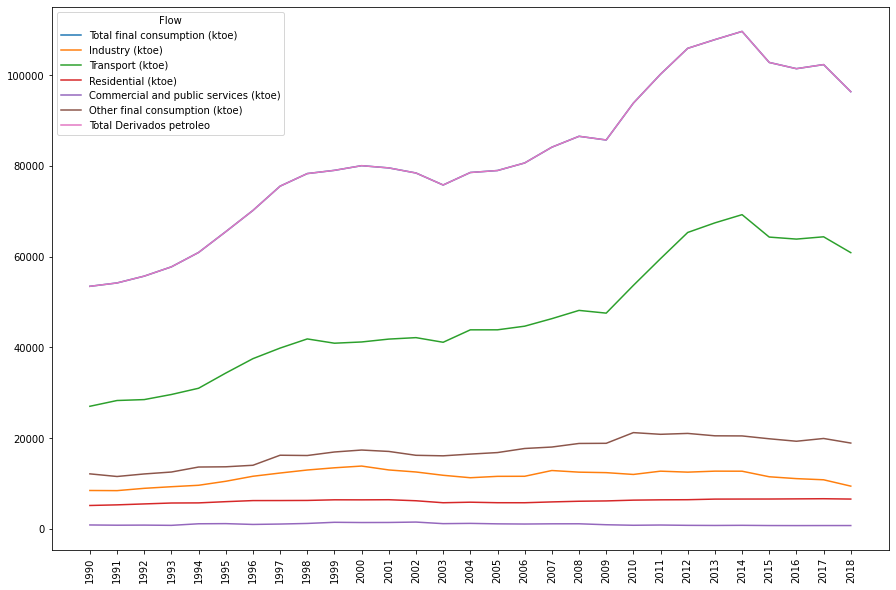

In [22]:
commanPlot(total_br_prod_fossiel)

##### Conclusões: Como esperado a indústria do transporte e a maior consumidora desse tipo de energia , vale ressaltar que no ano de 2018 a diferença entre este e o segundo colocado e de significantes 30000 ktoe aproximadamente. Outra análise interessante e quanto a indústria agrícola que apesar de seu baixo consumo energético como visto nos gráficos anteriores esta é a segunda maior consumidora de energia fóssil. Por fim, o consumo das industrias, residências e comércio são  os que possuem menores, e bem menores também quando se comprado ao seus consumos de energia renovável. Uma conclusão parcial que podemos chegar é que a produção de energia fóssil no Brasil ainda só possui seu poder devido ao consumo da indústria de transporte que chega a ser maior que o consumos das industrias com energias renováveis. 

#### 6) Os graficos a seguir mostrará o consumo residencia entre as diferente fontes de produção de energia

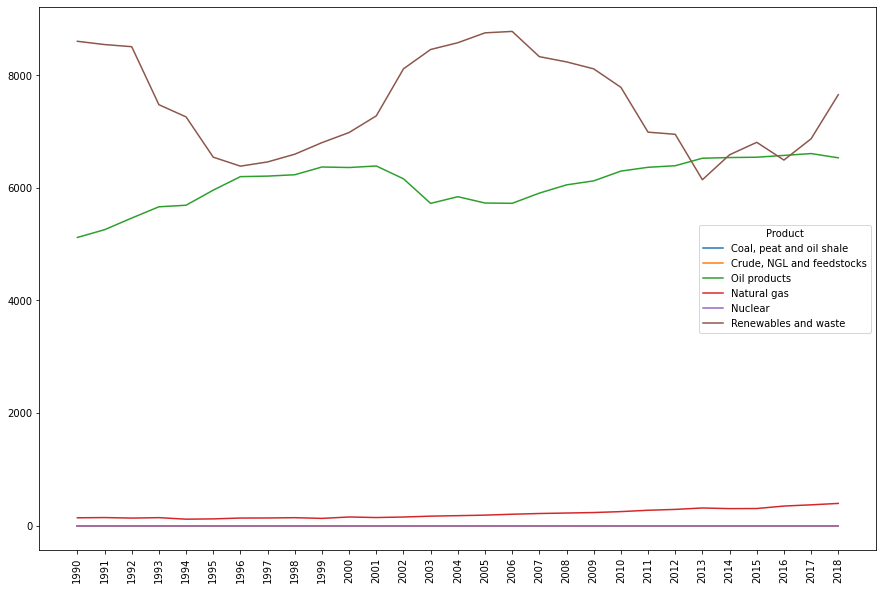

In [23]:
#consumo residencial no brasil
residential = br.xs('Residential (ktoe)',level='Flow').iloc[0:6].transpose()
commanPlot(residential)

<AxesSubplot:ylabel='2018'>

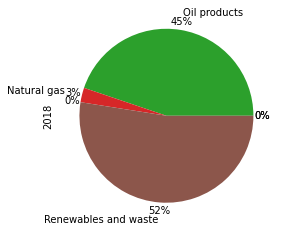

In [24]:
residential.loc[(2018)].plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

##### Conclusões: O consumo energético de residência se baseia nos dois grandes produtores energético fóssil e renovável, enquanto as outras fontes representam, praticamente 0% como visto no gráfico de pizza. 

#### Algo que notamos de estranho foi o comportamento da energia renovável ao longo dos anos uma vez que em 1990 esta possui uma altíssima taxa de uso e por algum motivo do qual não conseguimos constatar nos ano de 1992 esta teve um brusca queda que se repetiu de forma mais sutil a partir de 2006 a ponto de em 2013 a energia fóssil superar seu consumo.

#### 7) Os gráficos a seguir mostrará o consumo do mundo dividido entre alguns setores, incluindo a soma total de consumo

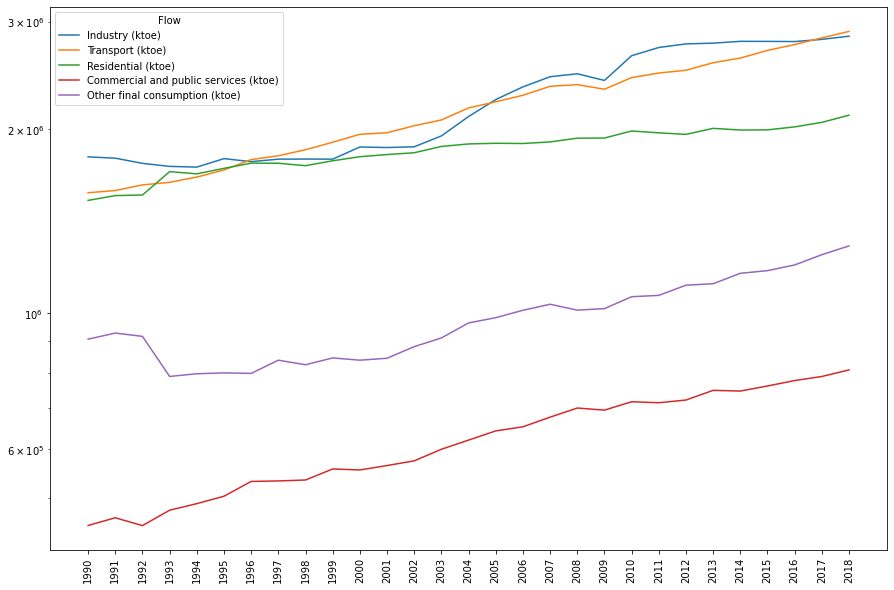

In [25]:
total_wrld:pd.DataFrame = world.loc[('Total')].iloc[7:12].transpose()

#consumo total no mundo inteiro
total_wrld.plot(figsize=(15,10))
plt.xticks(years)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [26]:
total_wrld.loc[(1990)]

Flow
Industry (ktoe)                          1.803105e+06
Transport (ktoe)                         1.575288e+06
Residential (ktoe)                       1.530461e+06
Commercial and public services (ktoe)    4.503503e+05
Other final consumption (ktoe)           9.079722e+05
Name: 1990, dtype: float64

In [27]:
total_wrld.loc[(2018)]

Flow
Industry (ktoe)                          2.839313e+06
Transport (ktoe)                         2.890900e+06
Residential (ktoe)                       2.109205e+06
Commercial and public services (ktoe)    8.086192e+05
Other final consumption (ktoe)           1.289666e+06
Name: 2018, dtype: float64

##### Conclusões: Através desse grafico conseguimos perceber que todos as areas o consumos vem aumentando constantemente nos ultimos anos, se analisarmos os numeros vemos que houve um aumento de quase 2x em todos os setores. Vale notar que a setor de transporte foi a que teve um dos maiores aumentos superando ainda o setor indutrial no ano de 2017.

#### 8) O gráfico a seguir mostra a produção dos 3 tipos de fontes energeticas 

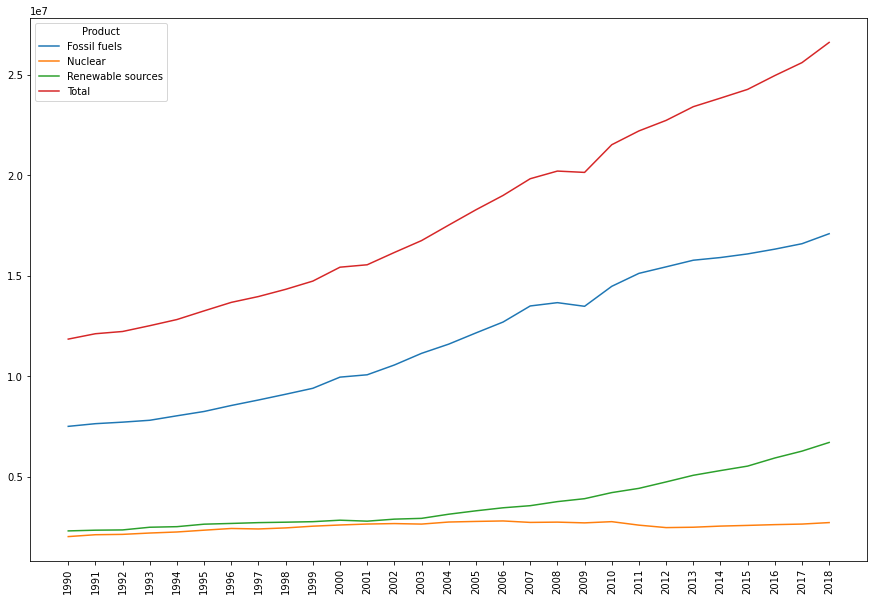

In [28]:
#Comparação de produção de energia mundial
eletric_wrld = world.xs('Electricity output (GWh)',level='Flow').transpose()
commanPlot(eletric_wrld)

##### Conclusões: E nítido a discrepância da produção de energia fóssil, principalmente, pois estamos em uma escala de 10⁷, todavia é perceptível que ao longo dos anos a energia renovável vem cada vez mais ganhando seu espaço, o que ainda não inibiu o crescimento das energias fósseis, mas em um futuro devido a todas as situações climáticas provavelmente irá.

#### 9) No gráfico a seguir veremos o somatório de energia renováveis por países desde 1990

<AxesSubplot:xlabel='Country'>

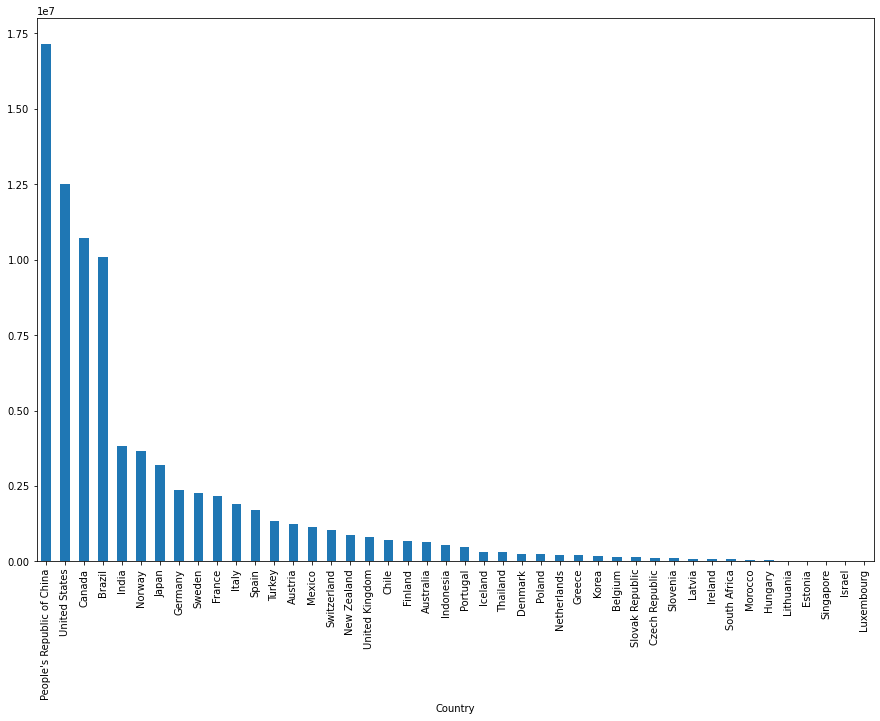

In [29]:
#maiores produtores de energias renovaveis desde 1990
eletricity_output = df.xs('Electricity output (GWh)',level='Flow')
eletricity_output_renew = eletricity_output.xs('Renewable sources',level='Product')
eletricity_output_renew.filter(items=countries, axis=0).transpose().sum().sort_values(ascending = False).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Country'>

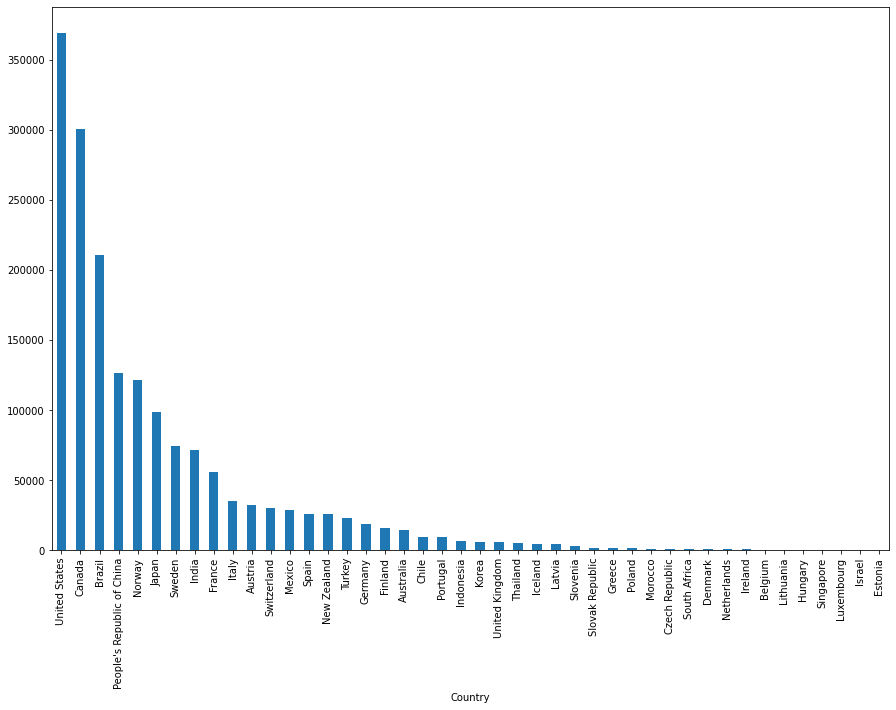

In [30]:
#maiores produtores em 1990
eletricity_output_renew.filter(items=countries, axis=0)[1990].transpose().sort_values(ascending = False).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Country'>

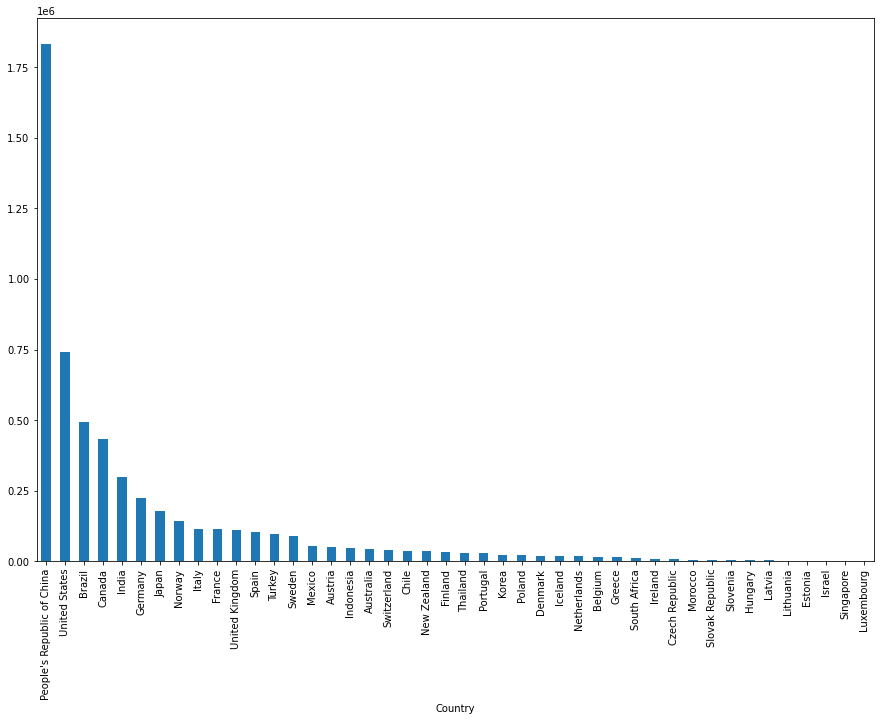

In [31]:
#maiores produtores em 2018
eletricity_output_renew.filter(items=countries, axis=0)[2018].transpose().sort_values(ascending = False).plot.bar(figsize=(15,10))

##### Conclusões: Podemos ver que desde 1990 o Brasil acumulo o posto de 4 lugar e 3 lugar em 2018 e 1990, o que mostra nossa constante evolução quanto às energias renováveis, sendo um dos maiores do mundo. Outra coisa que podemos notar é o alto cresimento da china tanto no acomulado que a já possui uma diferença significativa quanto sua evolução de 1990 para 2018 que saiu de 4 lugar para 1 de forma rápida e com significativa diferença para o segundo.

#### 10) No grafico a seguir veremos o somatorio de do total de energia consumida pelos países desde 1990

<AxesSubplot:xlabel='Country'>

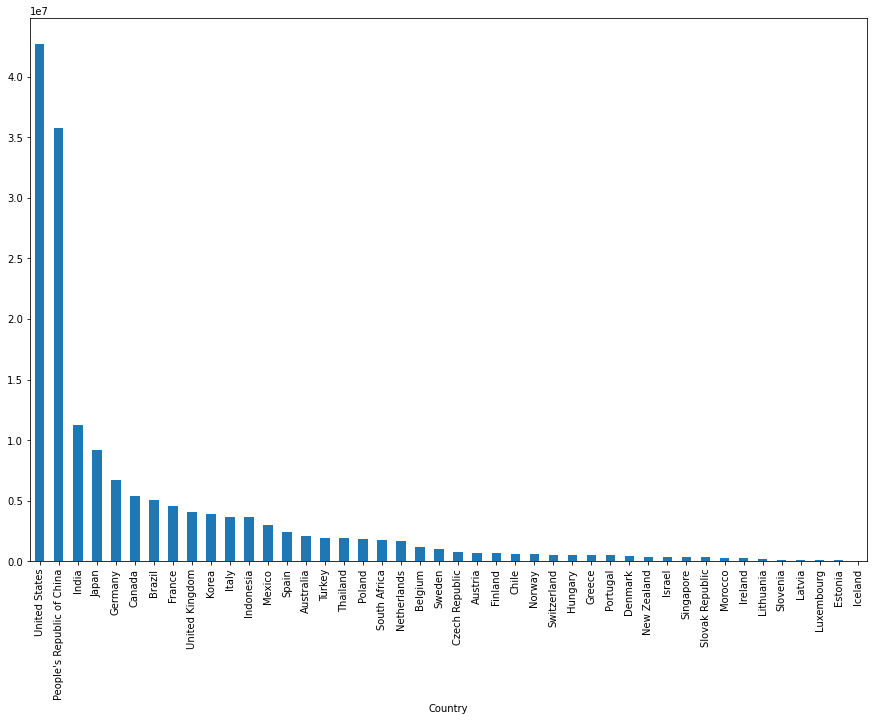

In [32]:
#maiores consumidores de energia no total
all_total = df.xs('Total', level = 'Product')
all_total_consuption = all_total.xs('Total final consumption (ktoe)', level = 'Flow')
all_total_consuption.filter(items=countries, axis=0).transpose().sum().sort_values(ascending = False).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Country'>

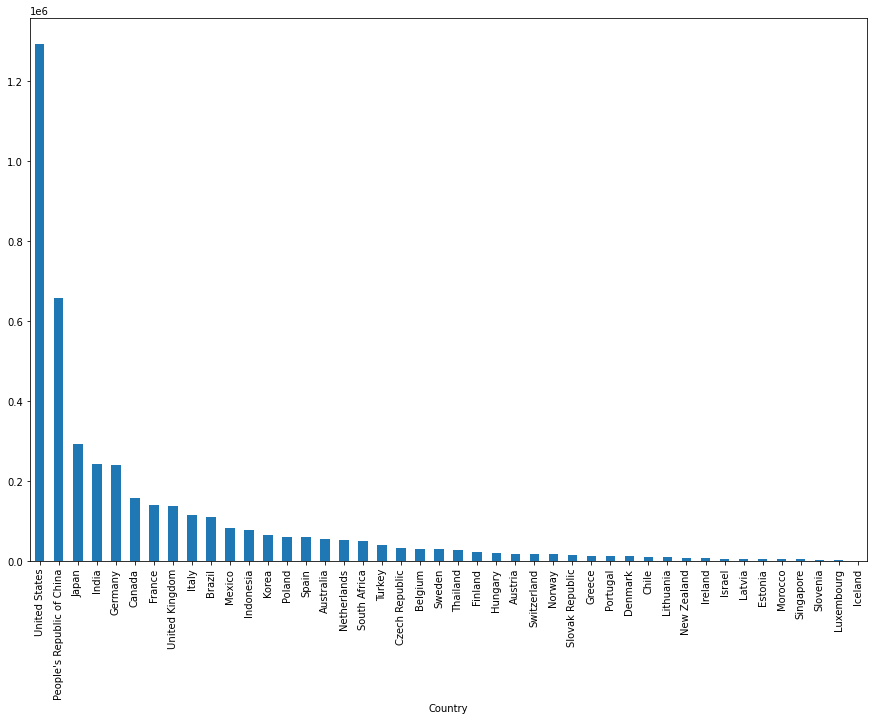

In [44]:
#maiores consumidores de energia 1990
all_total_consuption.filter(items=countries, axis=0).transpose().loc[(1990)].sort_values(ascending = False).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Country'>

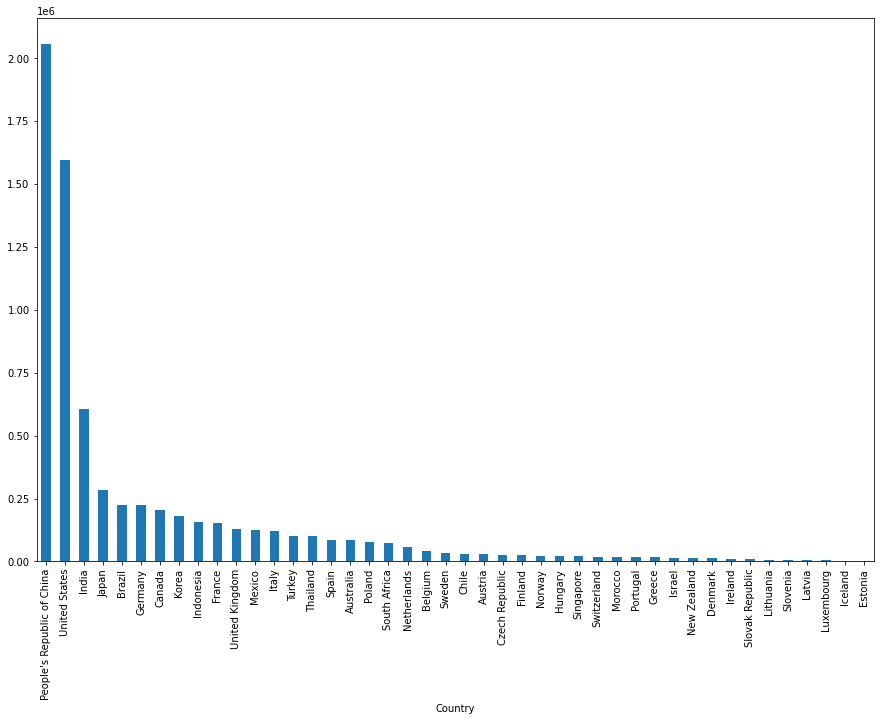

In [45]:
#maiores consumidores de energia 2018
all_total_consuption.filter(items=countries, axis=0).transpose().loc[(2018)].sort_values(ascending = False).plot.bar(figsize=(15,10))

##### Conclusões: O resultado quanto a Estudos Unidos e a Chinas  já era algo esperado após a análise dos gráficos anteriores, uma vez que este são os maiores produtores pode-se fazer analogia que também são um dos maiores consumidores. O resultado do Brasil, não foi muito diferente por também estar entre os países que mais produz energia.  Porém, o japão novamente surpreendeu com seu consumo devido ser uma ilha e estar a nível de países centenas de vezes maiores que ele.

#### 11) Crescimento do uso de energias não renováveis em relação às energias renováveis 

In [46]:
#crescimento do uso de energias não renovaveis em sob as energias renovaveis
all_consuption = df.xs('Total final consumption (ktoe)', level = 'Flow')
all_consuption

1990          1991          1992  \
Country   Product                                                               
Australia Coal, peat and oil shale   4.557633e+03  4.643242e+03  4.651457e+03   
          Crude, NGL and feedstocks  4.483600e+00  0.000000e+00  2.037600e+00   
          Oil products               2.899410e+04  2.822925e+04  2.876103e+04   
          Natural gas                8.655267e+03  8.710555e+03  8.877150e+03   
          Nuclear                    0.000000e+00  0.000000e+00  0.000000e+00   
...                                           ...           ...           ...   
World     Nuclear                    0.000000e+00  0.000000e+00  0.000000e+00   
          Renewables and waste       7.943423e+05  8.067610e+05  8.196553e+05   
          Electricity                8.342540e+05  8.608208e+05  8.665838e+05   
          Heat                       3.362891e+05  3.368480e+05  3.371962e+05   
          Total                      6.267177e+06  6.333490e+06  6.311526e+06   

                                             1993          1994          1995  \
Country   Product                                                               
Australia Coal, peat and oil shale   4.747825e+03  4.722309e+03  4.668974e+03   
          Crude, NGL and feedstocks  3.056400e+00  3.056400e+00  3.229400e+00   
          Oil products               2.954258e+04  3.026705e+04  3.139460e+04   
          Natural gas                9.092648e+03  9.513113e+03  9.990972e+03   
          Nuclear                    0.000000e+00  0.000000e+00  0.000000e+00   
...                                           ...           ...           ...   
World     Nuclear                    0.000000e+00  0.000000e+00  0.000000e+00   
          Renewables and waste       8.214918e+05  8.306368e+05  8.474888e+05   
          Electricity                8.837896e+05  9.068709e+05  9.350083e+05   
          Heat                       3.340331e+05  3.077939e+05  2.866524e+05   
          Total                      6.349573e+06  6.383283e+06  6.536286e+06   

                                             1996          1997          1998  \
Country   Product                                                               
Australia Coal, peat and oil shale   4.454252e+03  4.703711e+03  4.509217e+03   
          Crude, NGL and feedstocks  0.000000e+00  0.000000e+00  0.000000e+00   
          Oil products               3.250646e+04  3.294335e+04  3.310695e+04   
          Natural gas                1.014254e+04  1.031197e+04  1.064428e+04   
          Nuclear                    0.000000e+00  0.000000e+00  0.000000e+00   
...                                           ...           ...           ...   
World     Nuclear                    0.000000e+00  0.000000e+00  0.000000e+00   
          Renewables and waste       8.566882e+05  8.639104e+05  8.748581e+05   
          Electricity                9.656165e+05  9.884061e+05  1.013198e+06   
          Heat                       2.619860e+05  2.493840e+05  2.476850e+05   
          Total                      6.645895e+06  6.729651e+06  6.743126e+06   

                                             1999  ...          2009  \
Country   Product                                  ...                 
Australia Coal, peat and oil shale   4.398086e+03  ...  3.411307e+03   
          Crude, NGL and feedstocks  0.000000e+00  ...  1.550660e+01   
          Oil products               3.358626e+04  ...  3.815753e+04   
          Natural gas                1.087582e+04  ...  1.208528e+04   
          Nuclear                    0.000000e+00  ...  0.000000e+00   
...                                           ...  ...           ...   
World     Nuclear                    0.000000e+00  ...  0.000000e+00   
          Renewables and waste       9.087821e+05  ...  1.004590e+06   
          Electricity                1.043676e+06  ...  1.439072e+06   
          Heat                       2.474631e+05  ...  2.558377e+05   
          Total    

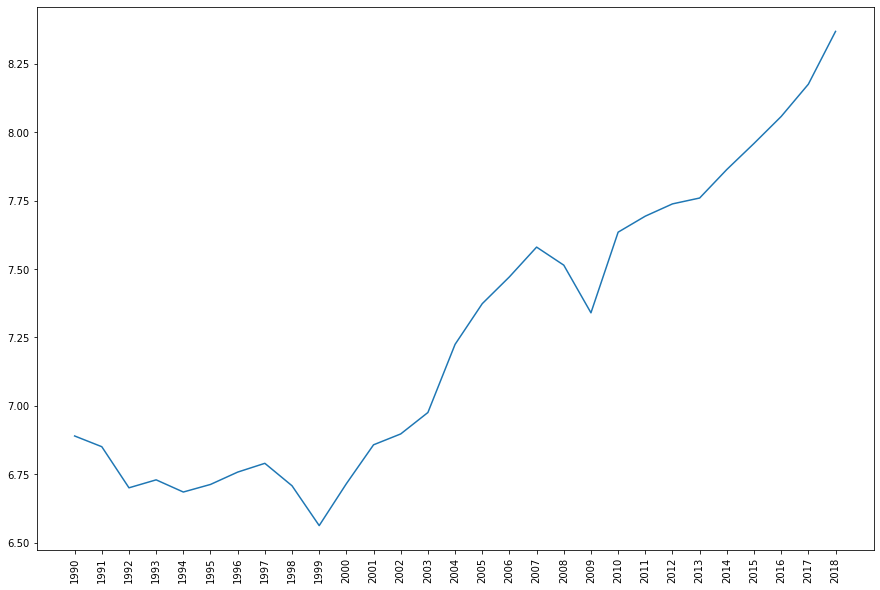

In [34]:

all_total_cons = all_consuption.xs('Total', level = 'Product')
all_renew_cons = all_consuption.xs('Renewables and waste', level = 'Product')
## all_total_renew_ratio é igual a todo consumo menos o consumo renovavel, divido pelo consumo renovavel, ou seja, todo consumo não renovavel divido pelo consumo renovavel, é a grandeza de vezes a qual o consumo nao renovavel é maior que o consumo renovavel.
all_total_renew_ratio = (all_total_cons - all_renew_cons) / all_renew_cons
commanPlot(all_total_renew_ratio.loc[('World')])

##### Conclusões: Esse gráfico é a relação da quantidade total de energias não renováveis sobre as renováveis, de forma que ele representa uma imagem do mundo dos anos que aos quais tiveram um maior consumo de energia renovável, vale ressaltar que nesse gráficos a melhor situação seria decrescente, pois demonstraria que o consumo mundial está voltado a mais energias renováveis que não renováveis. 

#### Analisando o gráfico a fundo, vemos uma realidade infeliz na qual o ideal seria estar crescendo o número de consumos de energias não renováveis. Esse gráfico possui inconsistência em dois anos 1999 e 2010, não foi possível constar a causa, mas parecem casos interessantes de serem estudos.

#### Uma hipótese que chegamos para a consequência desse alto crescimento nos últimos anos, pode ser devido ao  grande crescimento da china nos último anos, está que devido seu rápido crescimento não vem se sustenta somente com as energias renováveis e é obrigada a usar as não renováveis.

#### 12) Países ou regiões com consumo de energia renovavel maior que não renováveis 

In [54]:
# africa é o unico continente que utiliza mais energia renovavel que não renovavel, mesmo que entre os dados existam varios paises
paises_renovaveis = all_total_renew_ratio[all_total_renew_ratio <= 1]
paises_renovaveis.dropna()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Africa,0.728063,0.723668,0.718427,0.709251,0.668029,0.687281,0.711117,0.733703,0.719112,0.722521,...,0.869881,0.870838,0.857727,0.895907,0.910185,0.930783,0.919365,0.920757,0.936484,0.972752


##### Conclusões: Não houve nenhum país e somente uma região ao qual a energia renovável e mais consumida que não renovável, uma infeliz realidade. Por outro lado também seria interessante estudar para entender o porque a áfrica como região foi a única que possui um consumo maior de energia renovável que não renovável.

#### 13) Crescimento da energia renovável por setor

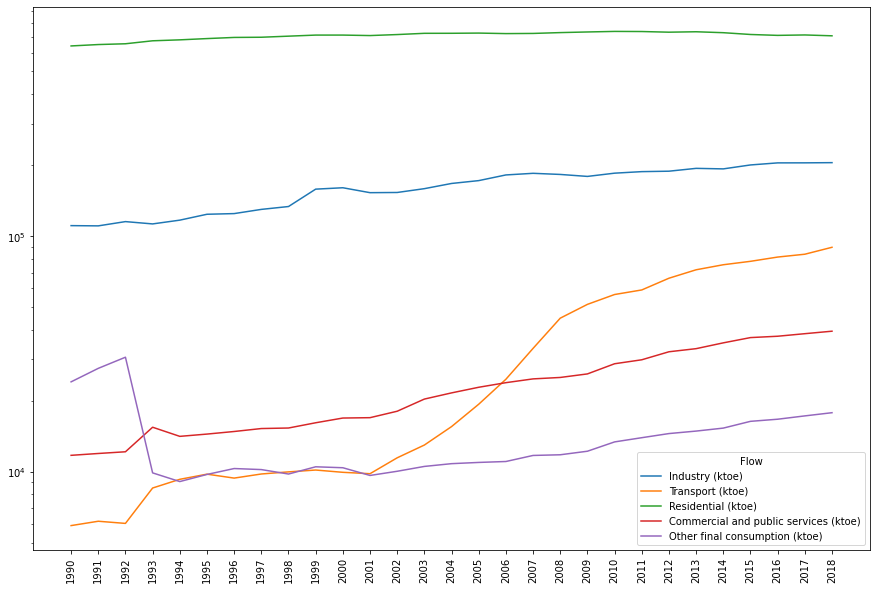

In [36]:
#quais setores a energia renovavel cresceu
world.loc[('Renewables and waste')].iloc[7:].transpose().plot(figsize=(15,10))
plt.xticks(years)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

##### Conclusões: No gráfico acima podemos observar um grande aumento do uso de energias renováveis na área de transporte a partir de 2001, além disso, podemos observar um crescimento moderado na área comercial e de serviços públicos e outros. 
#### Por outro lado o setor de outros consumos teve uma brusca queda em seu consumo energético. Já o consumo residencial se manteve constante durante todos os anos o que mostra que a inovação para mudança para energia renováveis precisa-se advir dos demais setores, principalmente o de transporte devido ao seu alto consumo de energia não renováveis.

##### Nos gráficos a seguir é importante apontar que neste conjunto de dados existem poucos países da Ásia, da América e da Oceania, além disso, os dados de todos os países da África estão concentrados em um único item.

#### 14) Cresimento do consumo energético ao longo dos anos por continente 

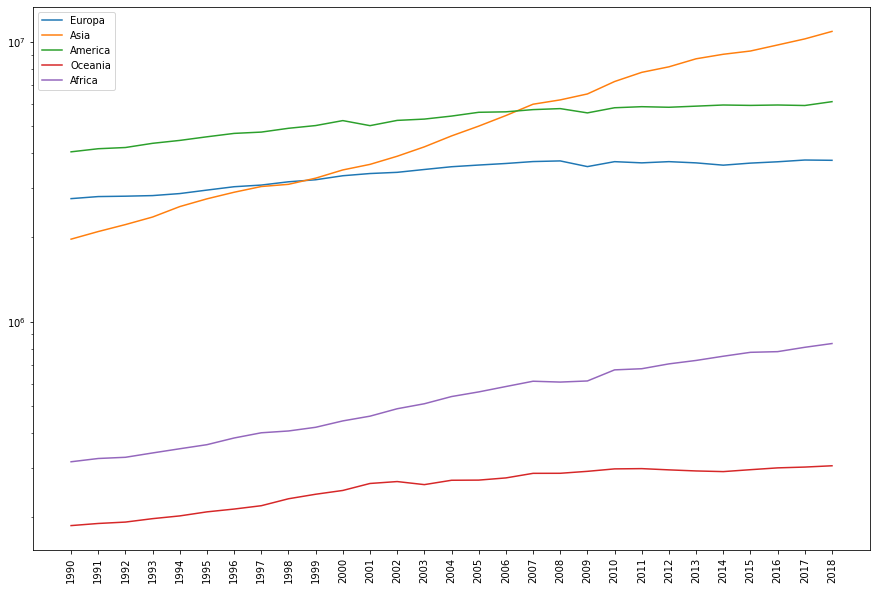

In [37]:
#crescimento da produção total ao longo dos anos por regioẽs
regions_prod = eletricity_output.xs('Total', level = 'Product')
europe = regions_prod.filter(items=europa, axis=0).sum()
asia_prod = regions_prod.filter(items=asia, axis=0).sum()
america_prod = regions_prod.filter(items=america, axis=0).sum()
oceania_prod = regions_prod.filter(items=oceania, axis=0).sum()
africa_prod = eletricity_output.loc[('Africa', 'Total')]
plt.figure(figsize=(15,10))
europe.plot()
asia_prod.plot()
america_prod.plot()
oceania_prod.plot()
africa_prod.plot()
plt.xticks(years)
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(['Europa','Asia', 'America', 'Oceania', 'Africa'])
plt.show()

##### Conclusões: Aqui podemos observar o crescimento estável por parte de quase todos os continente com exceção da Ásia, passando a Europa e a América, principalmente alavancado pelo crescimento da China.

#### 15) Crescimento da geração de energia renovável por continente

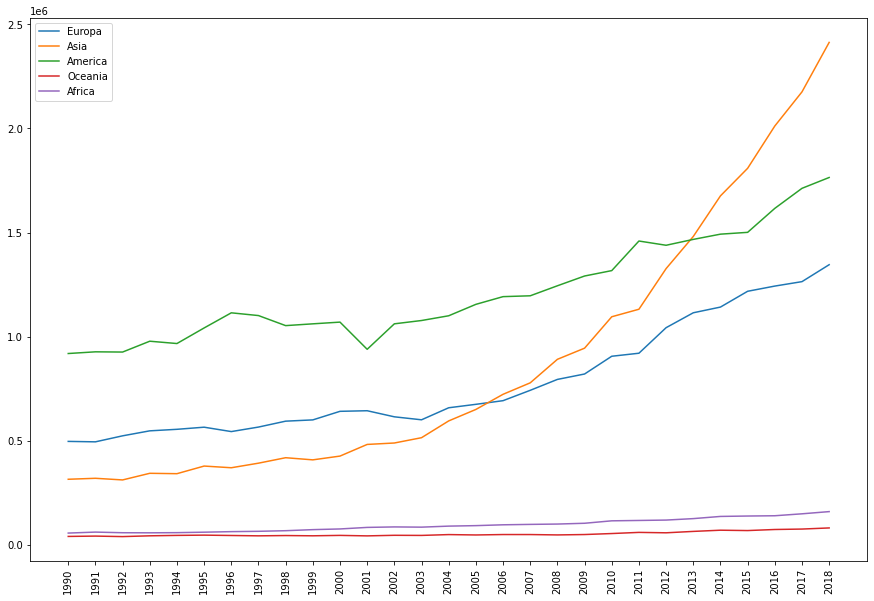

In [38]:
#crescimento da produção de energia renovavel ao longo dos anos por regioẽs
regions_renew = eletricity_output.xs('Renewable sources', level = 'Product')
europe_renew = regions_renew.filter(items=europa, axis=0).sum()
asia_renew = regions_renew.filter(items=asia, axis=0).sum()
america_renew = regions_renew.filter(items=america, axis=0).sum()
oceania_renew = regions_renew.filter(items=oceania, axis=0).sum()
africa_renew = eletricity_output.loc[('Africa', 'Renewable sources')]
plt.figure(figsize=(15,10))
europe_renew.plot()
asia_renew.plot()
america_renew.plot()
oceania_renew.plot()
africa_renew.plot()
plt.legend(['Europa','Asia', 'America', 'Oceania', 'Africa'])
plt.xticks(years)
plt.xticks(rotation=90)
plt.show()

##### Conclusões: Podemos observar o crescimento da energia renovável em todos os continentes, especialmente na Asia, sendo novamente impulsionada pelo crescimento em todas as áreas da China.

#### 16) Crescimento da produção de energia na china ao longo dos anos

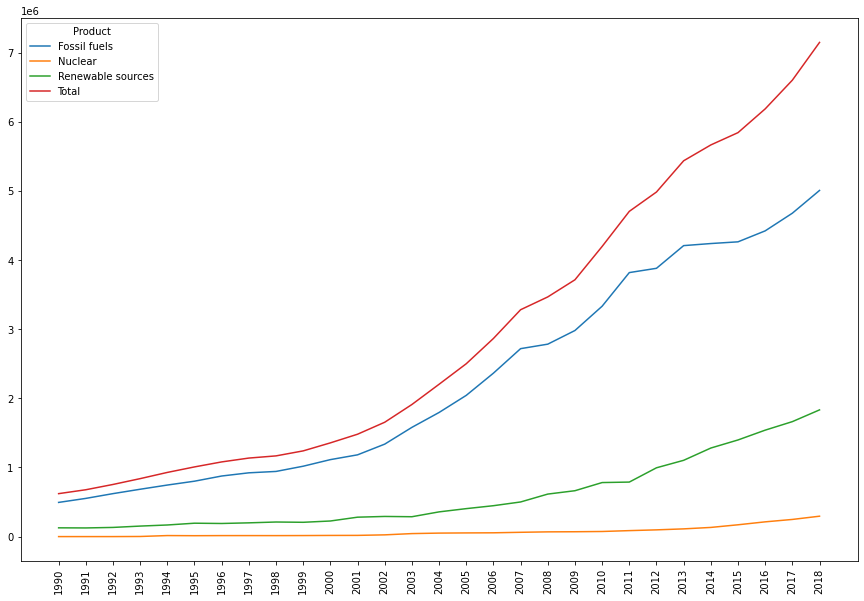

In [39]:
#Crescimento da china ao longo dos anos
eletric_china = df.loc[('People\'s Republic of China')].xs('Electricity output (GWh)',level='Flow').transpose()
commanPlot(eletric_china)

##### Conclusões: Junto com seu alto crescimento econômico, a China começou um grande crescimento energético por volta dos anos 2000, além de ter tido um crescimento moderado nos anos anteriores, até se tornar o maior produtor de energia no mundo.

#### 17) Consumo do setor de transporte por fontes de energia

<AxesSubplot:ylabel='None'>

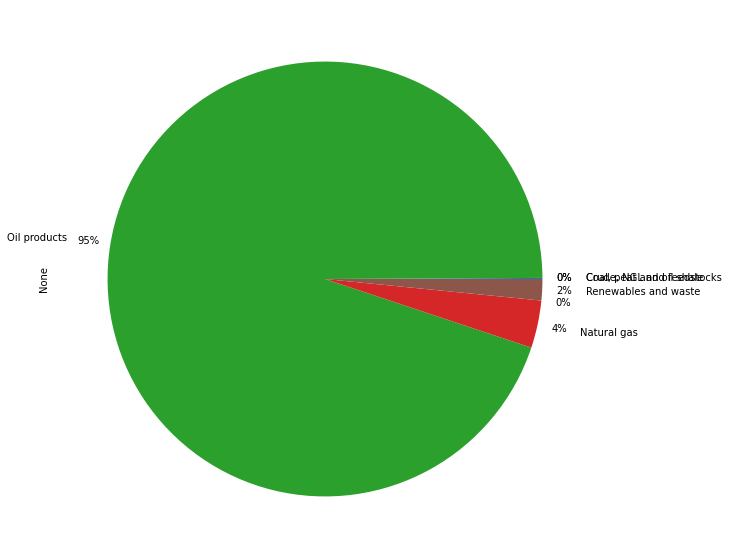

In [40]:
#Soma do consumo da área de transporte mundial desde 1990
transport_wrld = world.xs('Transport (ktoe)',level='Flow').iloc[0:6].transpose()
transport_wrld.sum().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(15,10))

#### Conclusão: A área de transporte mundial utiliza 95% de energia vinda de produtos derivados do petróleo, o que demonstra que essa área não é muito sustentável e precisa de mudanças.